In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
d = pd.read_csv('titanic.csv')

# general analysis

In [147]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
d.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [149]:
d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [150]:
d.shape

(891, 12)

In [151]:
d.shape[0] #rows

891

In [152]:
d.shape[1]  #columns

12

In [153]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:


d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


limitation of mean = mean is affected by thhe extreme lower and higher value 

median = if the data contain extreme lower and higher value then we can take median value for analysis

# Data Preprocessing

In [155]:
a=d.isnull().sum()
a

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [156]:
b=d.nunique()
b

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [157]:
c=d.dtypes
c

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Dataframe = columns = no of null value, Data type, Unique values, index =column name

In [158]:
df = pd.DataFrame({
    'No of Null Values': a,
    'Data Type': b,
    'Unique Values': c})
df

,No of Null Values,Data Type,Unique Values
PassengerId,0,891,int64
Survived,0,2,int64
Pclass,0,3,int64
Name,0,891,object
Sex,0,2,object
Age,177,88,float64
SibSp,0,7,int64
Parch,0,7,int64
Ticket,0,681,object
Fare,0,248,float64


fill values of age columns with median 
drop cabin column

In [159]:
d['Age']=d['Age'].fillna(d['Age'].median())
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [160]:
d['Age'].isnull().sum()

0

In [161]:
d.drop('Cabin', axis = 1,inplace = True)


In [162]:
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [163]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [164]:
d[d['Fare']>500]   #it will show all the column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [165]:
d[d['Fare']>500][['PassengerId','Survived','Pclass']]  #want to see data but not all column and the column you want 

,PassengerId,Survived,Pclass
258,259,1,1
679,680,1,1
737,738,1,1


In [166]:
d['Fare'].max()

512.3292

In [167]:
d[d['Fare'] == d['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


# Categorical Analysis

In [168]:
d['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

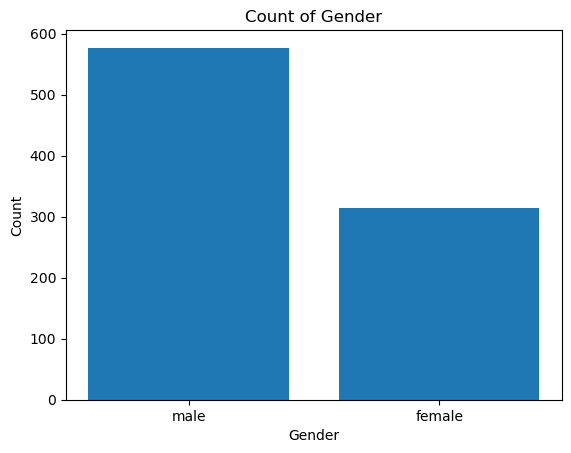

In [169]:
plt.bar(x=d['Sex'].value_counts().index,height = d['Sex'].value_counts())
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks()
plt.show()   

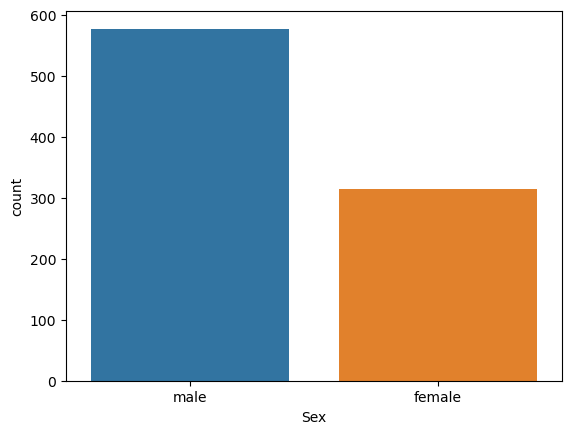

In [170]:
sns.countplot(x = 'Sex' ,data=d)
plt.show()

1.how many peole are survived or not survived
2.count of each class
3.count of sibsp
4.how may people are survived according to each class
5.how many male and female travel in each class
6.???????????????????????????????

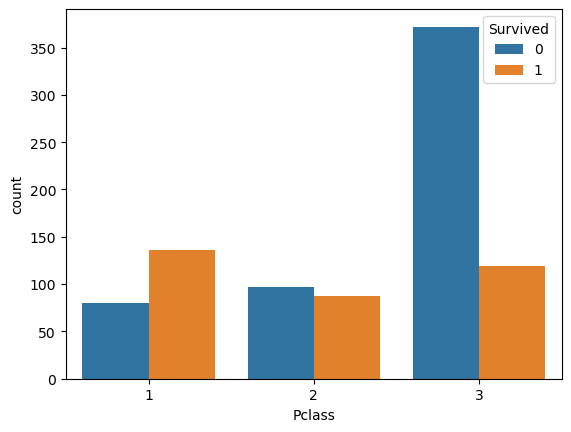

In [171]:
sns.countplot(x = 'Pclass' , data = d, hue = 'Survived')
plt.show()

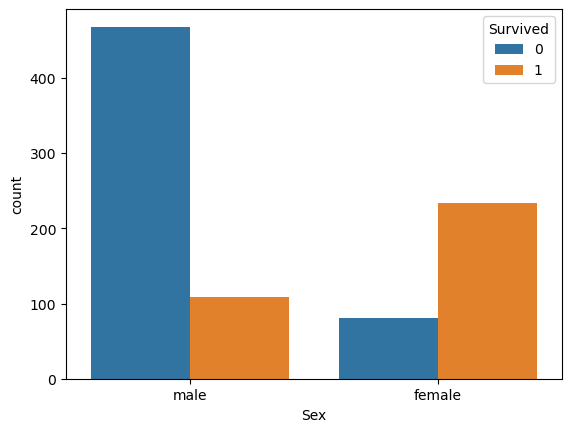

In [172]:
sns.countplot(x = 'Sex' , data = d, hue = 'Survived')
plt.show()

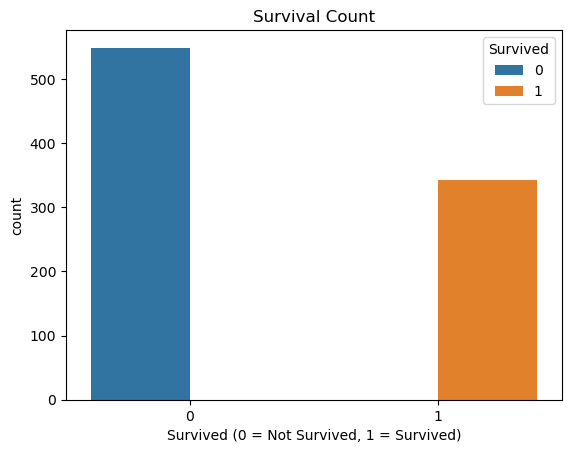

In [173]:
sns.countplot(x='Survived', data=d , hue = 'Survived')

plt.title('Survival Count')
plt.xlabel('Survived (0 = Not Survived, 1 = Survived)')
plt.show()

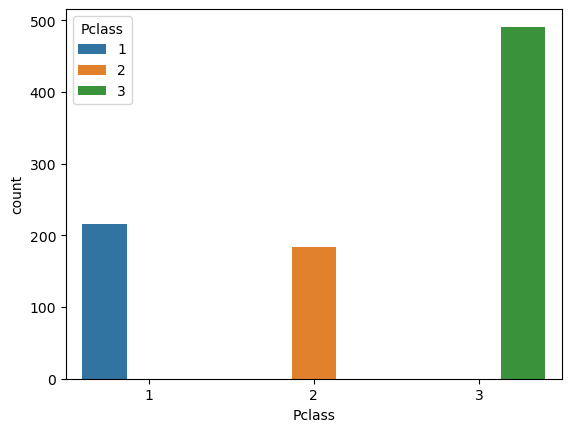

In [174]:
sns.countplot(x='Pclass', data=d, hue = 'Pclass')
plt.show()

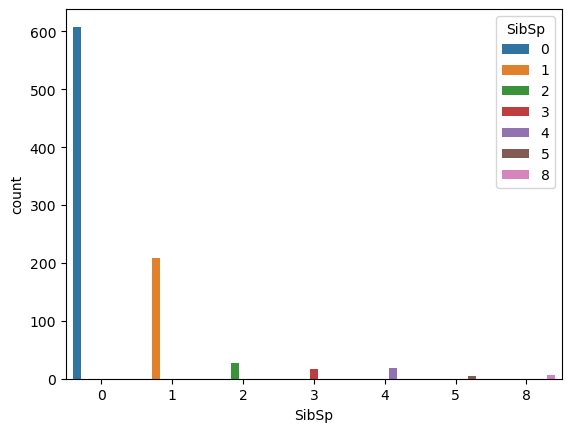

In [175]:
sns.countplot(x='SibSp', data=d, hue = 'SibSp')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

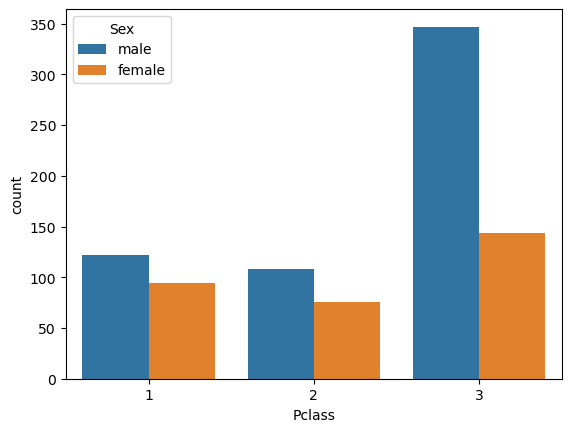

In [176]:
sns.countplot(x='Pclass', hue='Sex', data=d)


In [177]:
mf = pd.DataFrame({})

In [178]:
d[['Survived','Sex']].value_counts()

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
Name: count, dtype: int64

# Numerical Analysis

In [179]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


what is descrete and contiunes numerical data?

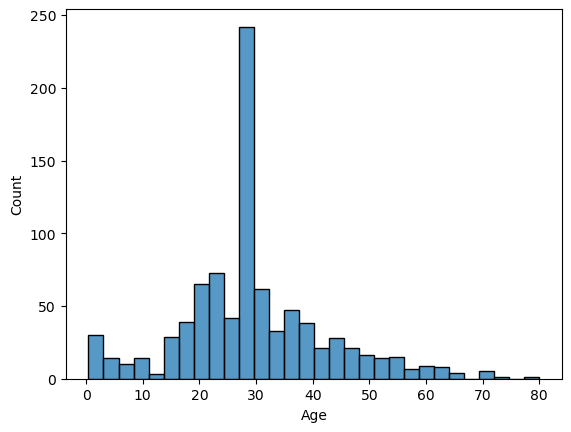

In [180]:
sns.histplot(x = 'Age', data = d)
plt.show()

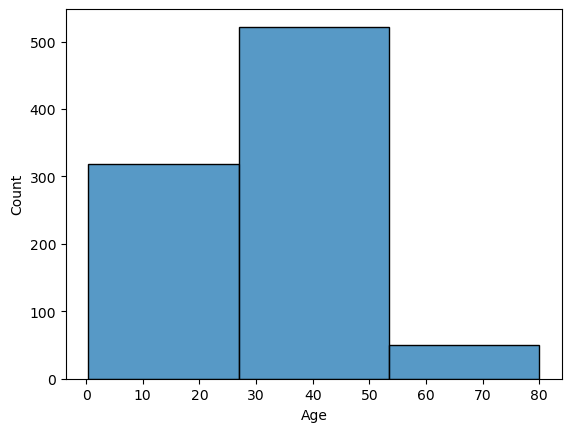

In [181]:
sns.histplot(x = 'Age', data = d,bins = 3)
plt.show()

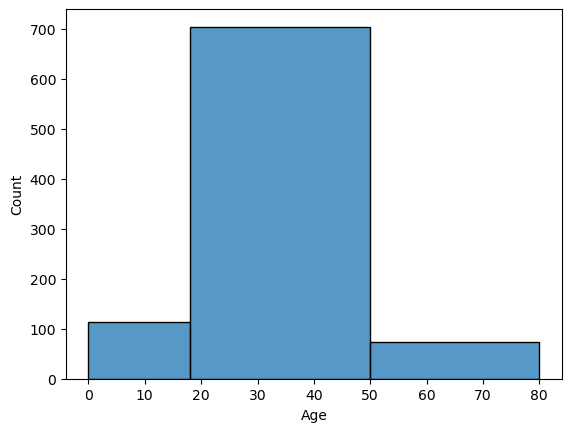

In [182]:
sns.histplot(x = 'Age', data = d,bins = [0,18,50,80])
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


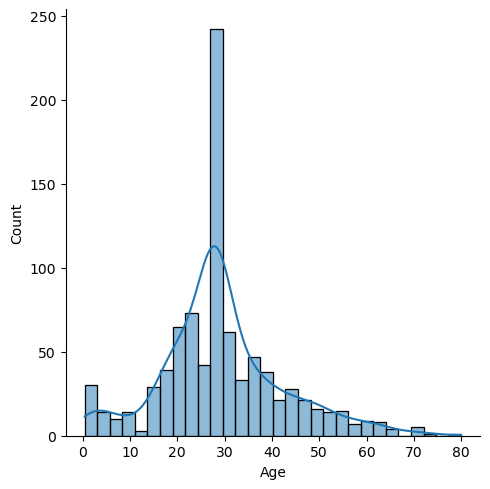

In [183]:
sns.displot(x = 'Age', data = d, kde = True)   
plt.show()

if mean > median == right skewed
if median > mean == left skewed
if mean = median =  mode === normal distribution

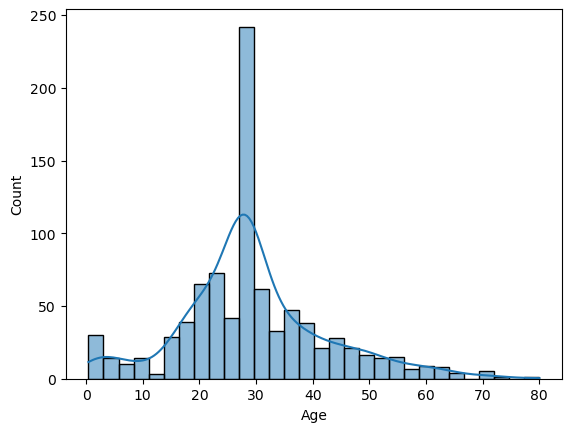

In [184]:
sns.histplot(x = 'Age', data = d, kde = True)
plt.show()

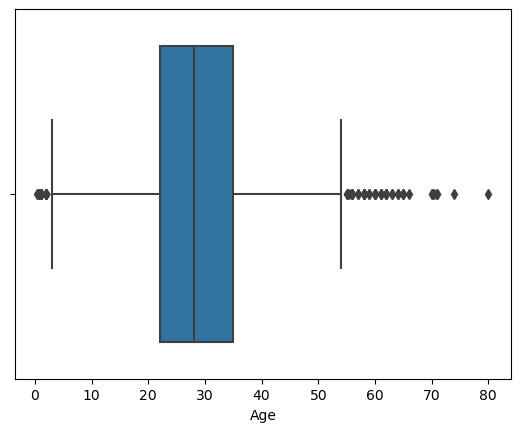

In [185]:
sns.boxplot(x = 'Age', data=d) #it uses IQR method
plt.show()

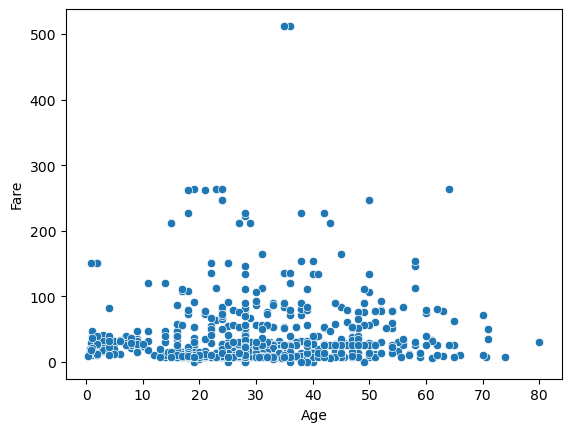

In [186]:
sns.scatterplot(x='Age',y = 'Fare',data =d)
plt.show()

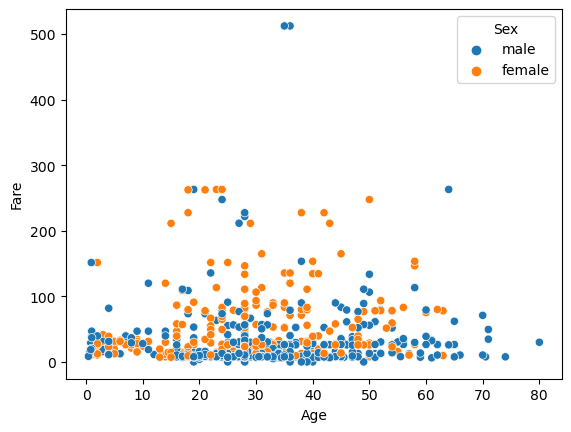

In [187]:
sns.scatterplot(x='Age',y = 'Fare',data =d, hue = 'Sex')
plt.show()